In [1]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# !pip install imblearn

In [2]:
#IMPORT REQUIRED LIBRARIES 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import warnings 

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay ,classification_report , accuracy_score
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE ,ADASYN
from imblearn.combine import SMOTETomek
from sklearn.linear_model import SGDClassifier

In [3]:
df2 = pd.read_csv(".\\dataset\\loan_data.csv")
df = df2

In [4]:
df2.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:

X = df2[["log.annual.inc", "dti"]].values
type(X)

numpy.ndarray

In [6]:
X[0]

array([11.35040654, 19.48      ])

## Data dictionary

|    | Variable          | Explanation                                                                                                             |
|---:|:------------------|:------------------------------------------------------------------------------------------------------------------------|
|  0 | credit_policy     | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                  |
|  1 | purpose           | The purpose of the loan.                                                                                                |
|  2 | int_rate          | The interest rate of the loan (more risky borrowers are assigned higher interest rates).                                |
|  3 | installment       | The monthly installments owed by the borrower if the loan is funded.                                                    |
|  4 | log_annual_inc    | The natural log of the self-reported annual income of the borrower.                                                     |
|  5 | dti               | The debt-to-income ratio of the borrower (amount of debt divided by annual income).                                     |
|  6 | fico              | The FICO credit score of the borrower.                                                                                  |
|  7 | days_with_cr_line | The number of days the borrower has had a credit line.                                                                  |
|  8 | revol_bal         | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).                           |
|  9 | revol_util        | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| 10 | inq_last_6mths    | The borrower's number of inquiries by creditors in the last 6 months.                                                   |
| 11 | delinq_2yrs       | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                           |
| 12 | pub_rec           | The borrower's number of derogatory public records.                                                                     |
| 13 | not_fully_paid    | 1 if the loan is not fully paid; 0 otherwise.   

[Source](https://www.kaggle.com/itssuru/loan-data) of dataset.

In [7]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
df=df[["log.annual.inc", "dti","inq.last.6mths","delinq.2yrs","pub.rec","not.fully.paid"]]

In [8]:
print("\nDataset information:")
df.shape


Dataset information:


(9578, 6)

In [9]:
## check data distribution for "not fully paid"

df["not.fully.paid"].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [10]:
# Check for missing values in the DataFrame
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
log.annual.inc    0
dti               0
inq.last.6mths    0
delinq.2yrs       0
pub.rec           0
not.fully.paid    0
dtype: int64


In [11]:
# Define the feature set and target variable
X = df.drop('not.fully.paid', axis=1)  # Features
y = df['not.fully.paid']  # Target variable

In [12]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7662, 5), (1916, 5), (7662,), (1916,))

In [13]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred_lr = logistic_regression_model.predict(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred_lr = logistic_regression_model.predict(X_test)

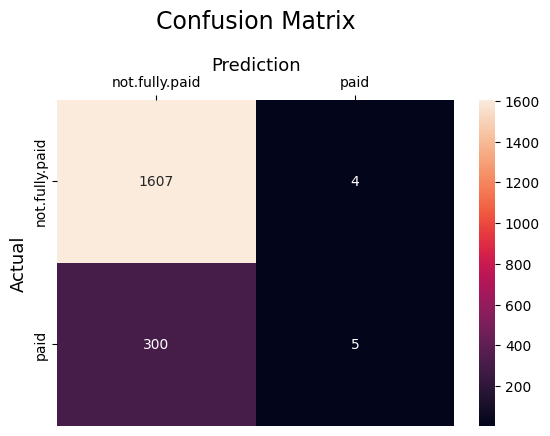

In [15]:
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, 
            annot=True,
            fmt='d', 
            xticklabels=['not.fully.paid','paid'],
            yticklabels=['not.fully.paid','paid'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, '', ha='center', fontsize=13)
plt.show()

# online learning using SGDClassifier

In [25]:
# Initialize the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Define the batch size
batch_size = 400


In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7662, 5), (1916, 5), (7662,), (1916,))

In [27]:
accuracy_df = pd.DataFrame(columns=["seq","accuracy"])
for i in range(0, len(X_train), batch_size):
    X_batch = X_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    
    sgd_clf.partial_fit(X_batch, y_batch, classes=np.unique(y))
    accuracy = sgd_clf.score(X_batch, y_batch)
    accuracy_df.loc[i] =[i,accuracy]
    
# Evaluate the model on the test set
accuracy = sgd_clf.score(X_test, y_test)
print(f"Final test set accuracy: {accuracy:.2f}")

Final test set accuracy: 0.72


In [28]:
accuracy_df

,seq,accuracy
0,0.0,0.155000
400,400.0,0.762500
800,800.0,0.845000
1200,1200.0,0.865000
1600,1600.0,0.837500
2000,2000.0,0.850000
2400,2400.0,0.792500
2800,2800.0,0.815000
3200,3200.0,0.807500
3600,3600.0,0.840000
